In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [12]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.optim as optim

In [ ]:
transform=transforms.ToTensor()
train_data=datasets.MNIST(root='data',train=True,download=True,transform=transform)
test_data=datasets.MNIST(root='data',train=False,download=True,transform=transform)

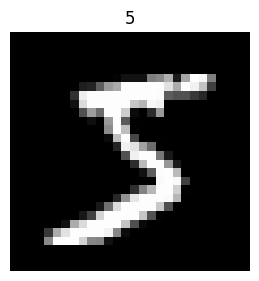

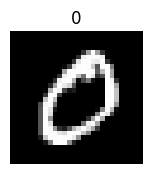

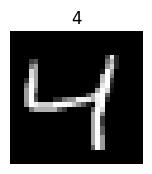

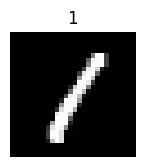

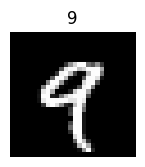

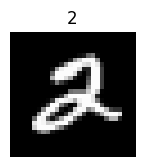

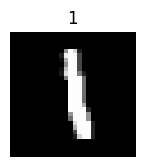

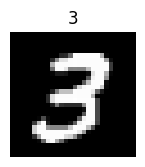

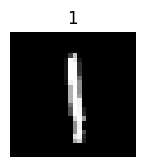

In [10]:
train_dataloader=DataLoader(train_data,shuffle=True,batch_size=64)
test_dataloader=DataLoader(test_data,shuffle=True,batch_size=64)
plt.figure(figsize=(8,8))
for i in range(9):
  img,label=train_data[i]
  plt.subplot(3,3,i+1)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(label)
  plt.axis('off')
  plt.tight_layout()
  plt.show()

In [16]:
model=nn.Sequential(nn.Flatten(),nn.Linear(784,128),nn.ReLU(),nn.Linear(128,64),nn.Linear(64,10))
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)
epochs=10
for i in range(epochs):
  running_loss=0
  model.train()
  for img,label in train_dataloader:
    pred=model(img)
    loss=criterion(pred,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()

model.eval()
total=0
correct=0
with torch.no_grad():
  for img,label in test_dataloader:
    pred=model(img)
    predicted = torch.argmax(pred, dim=1) # Get the predicted class index
    total+=label.size(0)
    correct+=(predicted==label).sum().item() # Compare predicted class with ground truth
print(f'Accuracy: {100*correct/total}')

Accuracy: 97.38
